In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SuperStoreOrders.csv')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [3]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [4]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

### Изменим типы данных

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'], format = 'mixed', dayfirst = True)
df['ship_date'] = pd.to_datetime(df['ship_date'], format = 'mixed', dayfirst = True)

In [6]:
df['sales'] = df['sales'].str.replace(',','')

In [7]:
df['sales'] = pd.to_numeric(df['sales'])

### Создадим таблицу продаж по месяцам и доп. колонку год-месяц

In [8]:
df_monthly_sales = df[['order_date', 'sales', 'profit', 'order_id']]
df_monthly_sales['month'] = df['order_date'].dt.strftime('%Y-%m')

C:\Users\cours\AppData\Local\Temp\ipykernel_11520\590508691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_sales['month'] = df['order_date'].dt.strftime('%Y-%m')


### Судя по графику долгосрочный тренд по выручке и прибыли попложительный, 
### причем выручка растет выраженными циклами, где пики роста приходятся на новогодние праздники

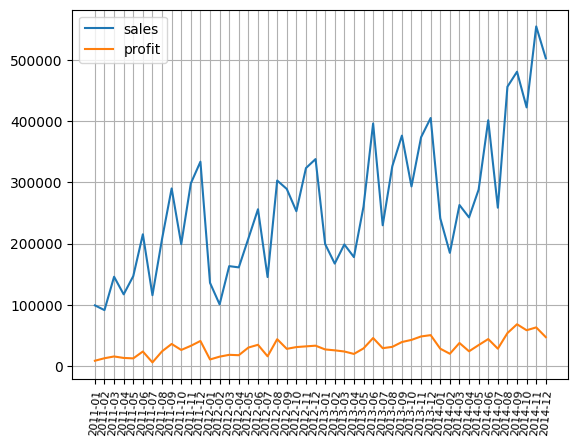

In [9]:
plt.plot(df_monthly_sales[['month', 'sales']].groupby('month', as_index = False).sum()['month'], 
         df_monthly_sales[['month', 'sales']].groupby('month', as_index = False).sum()['sales'], 
         df_monthly_sales[['month', 'profit']].groupby('month', as_index = False).sum()['month'],
        df_monthly_sales[['month', 'profit']].groupby('month', as_index = False).sum()['profit'])
plt.xticks(fontsize = 8, rotation = 85)
plt.legend(labels = ['sales', 'profit'])
plt.grid()
plt.show()

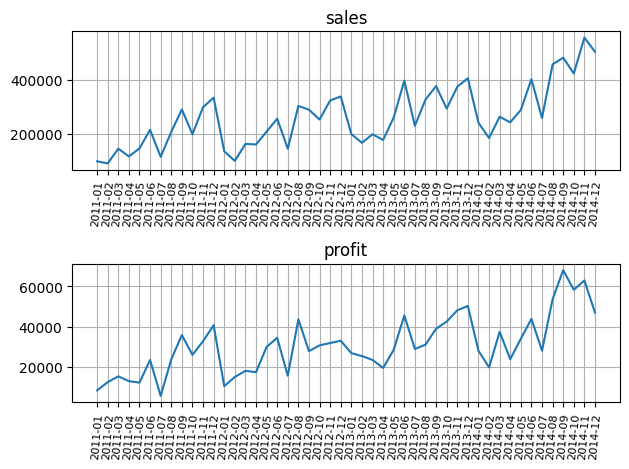

In [10]:
fig, ax = plt.subplots(2,1)

ax[0].plot(df_monthly_sales[['month', 'sales']].groupby('month', as_index = False).sum()['month'], 
        df_monthly_sales[['month', 'sales']].groupby('month', as_index = False).sum()['sales'])
ax[1].plot(df_monthly_sales[['month', 'profit']].groupby('month', as_index = False).sum()['month'],
           df_monthly_sales[['month', 'profit']].groupby('month', as_index = False).sum()['profit'])
ax[0].set_title('sales')
plt.setp(ax[0].get_xticklabels(), fontsize = 8, rotation = 85)
ax[0].grid()
ax[1].set_title('profit')
plt.setp(ax[1].get_xticklabels(), fontsize = 8, rotation = 85)
ax[1].grid()
fig.tight_layout()
plt.show()

### Расчитаем долю прибыли в выручке за каждый месяц и посмотрим на ее динамику

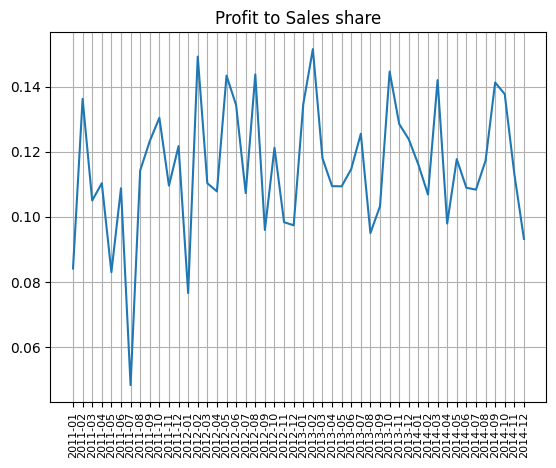

In [11]:
plt.plot(df_monthly_sales['month'].drop_duplicates(), df_monthly_sales[['month', 'profit']].groupby('month').sum()['profit']/\
         df_monthly_sales[['month', 'sales']].groupby('month').sum()['sales'])
plt.xticks(fontsize=8, rotation=90)
plt.title('Profit to Sales share')
plt.grid()
plt.show()

### Доля прибыли держится на уровне 10-14% в среднем

### Посчитаем прибыль по товару и посмотрим на самые доходные из них

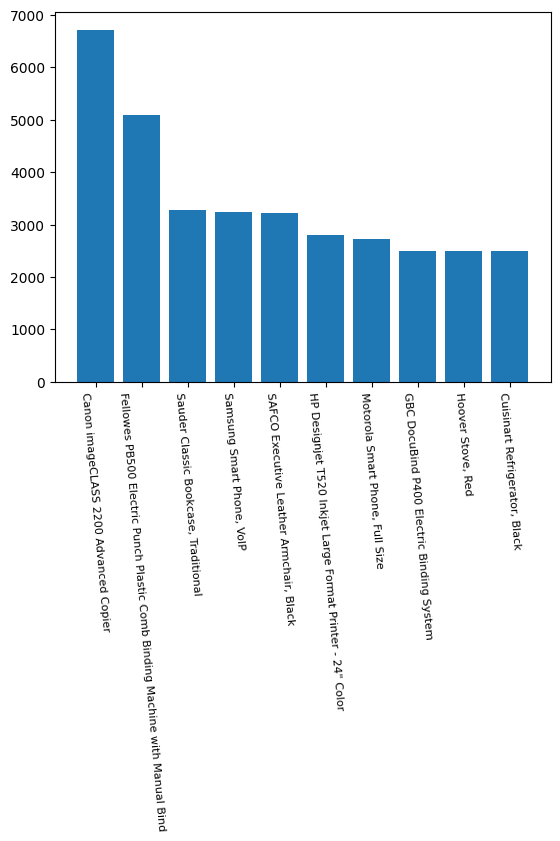

In [12]:
df_quantity_per_product = df[['product_name', 'profit']][df['order_date'].dt.month < 4].\
groupby('product_name', as_index=False).sum().sort_values('profit', ascending=False).head(10)
plt.bar(df_quantity_per_product['product_name'],df_quantity_per_product['profit'])
plt.xticks(fontsize=8, rotation=-85)
plt.show()

### Рассмотрим топ 20 стран с наибольшей выручкой и прибылью

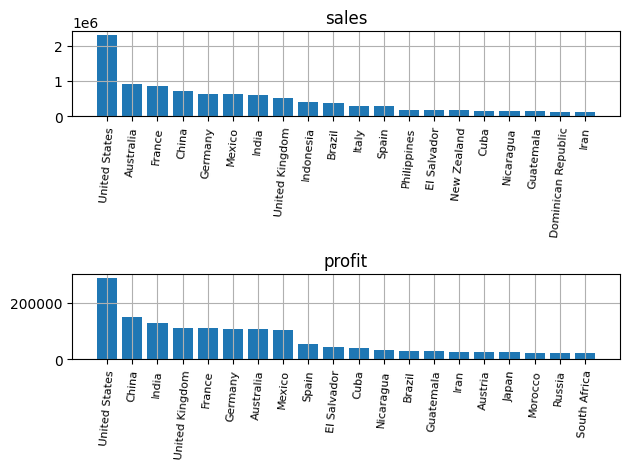

In [13]:
df_country_sales = df[['country', 'sales', 'profit']]
fig2, ax2 = plt.subplots(2,1)
ax2[0].bar(df_country_sales[['country', 'sales']].groupby('country', as_index = False)\
           .sum().sort_values('sales', ascending=False)['country'].head(20), 
        df_country_sales[['country', 'sales']].groupby('country', as_index = False)\
           .sum().sort_values('sales', ascending=False)['sales'].head(20))
ax2[1].bar(df_country_sales[['country', 'profit']].groupby('country', as_index = False)\
           .sum().sort_values('profit', ascending=False)['country'].head(20),
           df_country_sales[['country', 'profit']].groupby('country', as_index = False)\
           .sum().sort_values('profit', ascending=False)['profit'].head(20))
ax2[0].set_title('sales')
plt.setp(ax2[0].get_xticklabels(), fontsize = 8, rotation = 85)
ax2[0].grid()
ax2[1].set_title('profit')
plt.setp(ax2[1].get_xticklabels(), fontsize = 8, rotation = 85)
ax2[1].grid()
fig2.tight_layout()
plt.show()

### Интересно, что топ стран по выручке заметно отличается от топа по прибыли, посмотрим с чем этом связано

In [14]:
top_sales_countries= np.array(df_country_sales[['country', 'sales']].groupby('country', as_index = False)\
           .sum().sort_values('sales', ascending=False)['country'].head(10)) # топ стран по выручке
top_profit_countries= np.array(df_country_sales[['country', 'profit']].groupby('country', as_index = False)\
           .sum().sort_values('profit', ascending=False)['country'].head(10)) # топ стран по прибыли

### Посчитаем количество купленных товаров по категориям

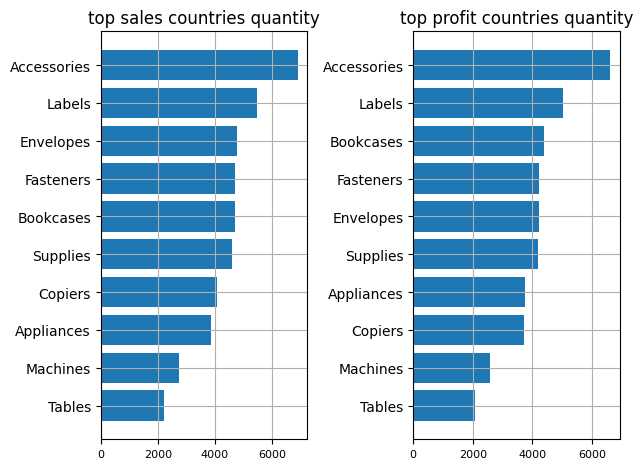

In [15]:
fig, ax = plt.subplots(1,2)


ax[0].barh(df[df['country'].isin(top_sales_countries)][['sub_category', 'quantity']].\
        groupby('sub_category', as_index=False).sum().sort_values('quantity', ascending=True).head(10)['sub_category'],
       df[df['country'].isin(top_sales_countries)][['sub_category', 'quantity']].\
        groupby('sub_category', as_index=False).sum().sort_values('quantity', ascending=True).head(10)['quantity'])
ax[0].grid()
ax[0].set_title('top sales countries quantity')
ax[1].barh(df[df['country'].isin(top_profit_countries)][['sub_category', 'quantity']].\
        groupby('sub_category', as_index=False).sum().sort_values('quantity', ascending=True).head(10)['sub_category'],
       df[df['country'].isin(top_profit_countries)][['sub_category', 'quantity']].\
        groupby('sub_category', as_index=False).sum().sort_values('quantity', ascending=True).head(10)['quantity'])
ax[1].grid()
ax[1].set_title('top profit countries quantity')
plt.setp([ax[0].get_xticklabels(), ax[1].get_xticklabels()], fontsize = 8)
fig.tight_layout()
plt.show()

### Количество товаров в вкатегориях и сами категории одинаковы, т.е. 
### в обоих топах нет существенной разницы по покупкам в категориях, значит дело в чем-то другом

### Расчитаем долю скидки в каждой покупке и общую сумму скидок по странам, а также затраты на доставку по странам

In [16]:
df['disc_amount'] = df['discount']*df['sales']

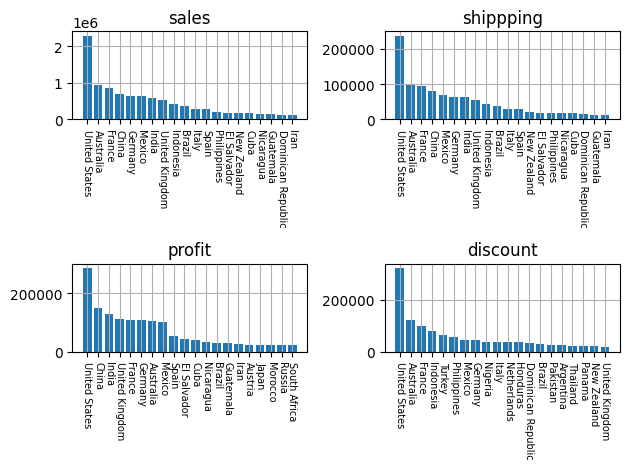

In [17]:
fig3, ax3 = plt.subplots(2,2)
ax3[0,0].bar(df_country_sales[['country', 'sales']].groupby('country', as_index = False)\
           .sum().sort_values('sales', ascending=False)['country'].head(20), 
        df_country_sales[['country', 'sales']].groupby('country', as_index = False)\
           .sum().sort_values('sales', ascending=False)['sales'].head(20))
ax3[0,0].set_title('sales')
ax3[0,0].grid()
ax3[0,1].bar(df[['country', 'shipping_cost']].groupby('country', as_index=False).sum()\
             .sort_values('shipping_cost', ascending=False)['country'].head(20),
        df[['country', 'shipping_cost']].groupby('country', as_index=False).sum()\
             .sort_values('shipping_cost', ascending=False)['shipping_cost'].head(20))
ax3[0,1].grid()
ax3[0,1].set_title('shippping')
ax3[1,0].bar(df_country_sales[['country', 'profit']].groupby('country', as_index = False)\
           .sum().sort_values('profit', ascending=False)['country'].head(20),
           df_country_sales[['country', 'profit']].groupby('country', as_index = False)\
           .sum().sort_values('profit', ascending=False)['profit'].head(20))
ax3[1,0].grid()
ax3[1,0].set_title('profit')

ax3[1,1].bar(df[['country', 'disc_amount']].groupby('country', as_index=False).sum()\
             .sort_values('disc_amount', ascending=False)['country'].head(20),
        df[['country', 'disc_amount']].groupby('country', as_index=False).sum()\
             .sort_values('disc_amount', ascending=False)['disc_amount'].head(20))
ax3[1,1].grid()
ax3[1,1].set_title('discount')

plt.setp([ax3[0,0].get_xticklabels(), ax3[0,1].get_xticklabels(), ax3[1,0].get_xticklabels(),\
          ax3[1,1].get_xticklabels()], fontsize = 7, rotation = -90)
fig3.tight_layout()
plt.show()

### На графиках видим: список стран со скидками не коррелирует ни с одним топом, 
### зато топ по затратам по доставкам существенно сходится с топом по продажам, 
### другими словами сумма выручки сильно зависит от стоимости доставки

In [18]:
print('Коэффициент корреляции', ' ', np.corrcoef(df['sales'], df['shipping_cost'])[0,1])

Коэффициент корреляции   0.7680750467740111


In [19]:
### Рассмотрим продажи по сегментам
### На диаграме видно: более 50% выручки приходится на частного потребителя

([<matplotlib.patches.Wedge at 0x1b37518a010>,
 [Text(-0.05101028595755075, 1.0988166137834507, 'Consumer'),
  Text(-0.5538106253287469, -0.9504176930555231, 'Corporate'),
  Text(0.9237133752716357, -0.59728854027537, 'Home Office')],
 [Text(-0.027823792340482222, 0.5993545166091548, '51.5%'),
  Text(-0.30207852290658915, -0.518409650757558, '30.3%'),
  Text(0.5038436592390739, -0.32579374924111093, '18.3%')])

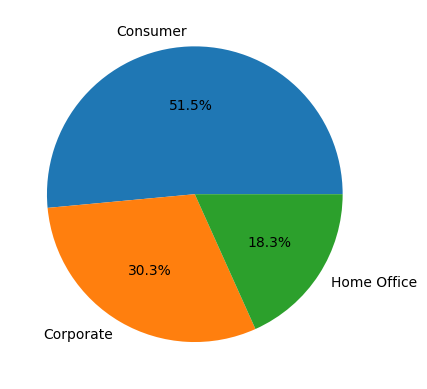

In [20]:
segment = plt.figure()
plt.pie(df[['sales', 'segment']].groupby('segment', as_index = False).sum()['sales'],
        labels = df[['sales', 'segment']].groupby('segment', as_index = False).sum()['segment'], autopct = '%1.1f%%')

### Посмотрим распределение продаж в разрезе товарных категорий и типа клиентов

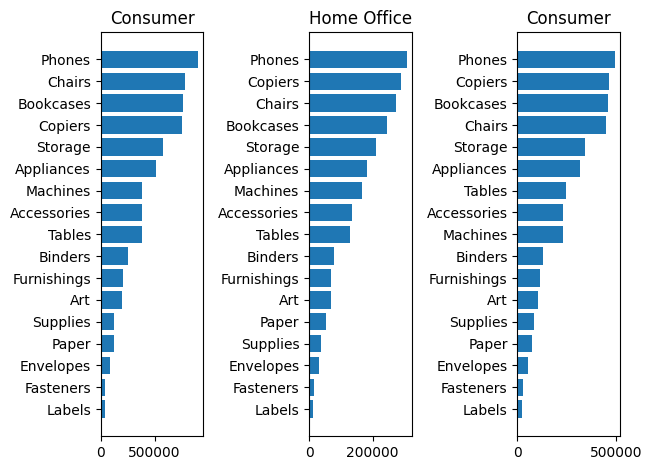

In [21]:
fig_segments, ax_seg = plt.subplots(1,3)
ax_seg[0].barh(df.query("segment == 'Consumer'")[['sub_category', 'sales']].\
               groupby('sub_category', as_index = False).sum().sort_values('sales', ascending = True)['sub_category'],
               df.query("segment == 'Consumer'")[['sub_category', 'sales']].\
               groupby('sub_category', as_index = False).sum().sort_values('sales', ascending = True)['sales'])
ax_seg[0].set_title('Consumer')
ax_seg[1].barh(df.query("segment == 'Home Office'")[['sub_category', 'sales']].\
               groupby('sub_category', as_index = False).sum().sort_values('sales', ascending = True)['sub_category'],
               df.query("segment == 'Home Office'")[['sub_category', 'sales']].\
               groupby('sub_category', as_index = False).sum().sort_values('sales', ascending = True)['sales'])
ax_seg[1].set_title('Home Office')
ax_seg[2].barh(df.query("segment == 'Corporate'")[['sub_category', 'sales']].\
               groupby('sub_category', as_index = False).sum().sort_values('sales', ascending = True)['sub_category'],
               df.query("segment == 'Corporate'")[['sub_category', 'sales']].\
               groupby('sub_category', as_index = False).sum().sort_values('sales', ascending = True)['sales'])
ax_seg[2].set_title('Consumer')
fig_segments.tight_layout()

### Все три категории клиентов покупают одинаковые товары в одинаковом количестве

### Рассмотрим топ категорий по продажам

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Labels'),
  Text(1, 0, 'Fasteners'),
  Text(2, 0, 'Envelopes'),
  Text(3, 0, 'Supplies'),
  Text(4, 0, 'Paper'),
  Text(5, 0, 'Art'),
  Text(6, 0, 'Furnishings'),
  Text(7, 0, 'Binders'),
  Text(8, 0, 'Accessories'),
  Text(9, 0, 'Tables'),
  Text(10, 0, 'Machines'),
  Text(11, 0, 'Appliances'),
  Text(12, 0, 'Storage'),
  Text(13, 0, 'Bookcases'),
  Text(14, 0, 'Chairs'),
  Text(15, 0, 'Copiers'),
  Text(16, 0, 'Phones')])

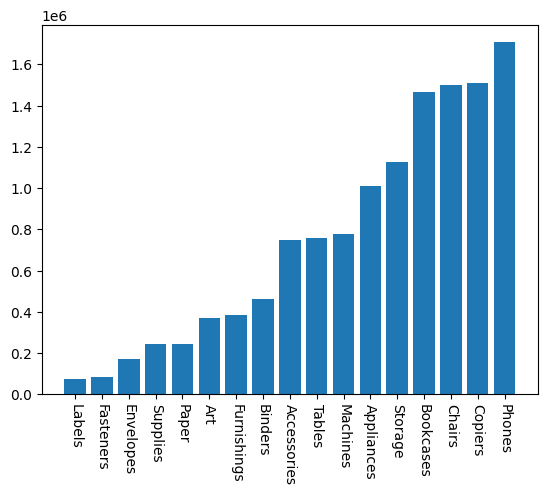

In [22]:
plt.bar(df[['sub_category', 'sales']].groupby('sub_category', as_index = False)\
        .sum().sort_values('sales', ascending = True)['sub_category'], 
       df[['sub_category', 'sales']].groupby('sub_category', as_index = False)\
        .sum().sort_values('sales', ascending = True)['sales'])
plt.xticks(fontsize = 10, rotation = -90)

### Самая продаваемая категория - телефоны, посмотрим как распределены продажи по ним подробнее

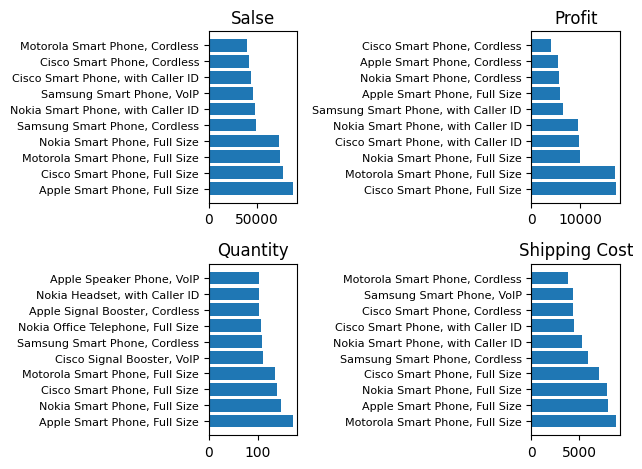

In [23]:
df_phones = df.query("sub_category=='Phones'")[['product_name', 'sales', 
                                                'profit', 'quantity', 'shipping_cost']].groupby('product_name',  as_index = False).sum().\
sort_values('profit' , ascending = False)
fig_ph, ax_ph = plt.subplots(2,2)
ax_ph[0,0].barh(df_phones.sort_values('sales', ascending = False)['product_name'].head(10), 
                df_phones.sort_values('sales', ascending = False)['sales'].head(10))
ax_ph[0,0].set_title('Salse')

ax_ph[0,1].barh(df_phones.sort_values('profit', ascending = False)['product_name'].head(10), 
                df_phones.sort_values('profit', ascending = False)['profit'].head(10))
ax_ph[0,1].set_title('Profit')

ax_ph[1,0].barh(df_phones.sort_values('quantity', ascending = False)['product_name'].head(10), 
                df_phones.sort_values('quantity', ascending = False)['quantity'].head(10))
ax_ph[1,0].set_title('Quantity')

ax_ph[1,1].barh(df_phones.sort_values('shipping_cost', ascending = False)['product_name'].head(10), 
                df_phones.sort_values('shipping_cost', ascending = False)['shipping_cost'].head(10))
ax_ph[1,1].set_title('Shipping Cost')
plt.setp([ax_ph[0,0].get_yticklabels(), ax_ph[0,1].get_yticklabels(), 
          ax_ph[1,0].get_yticklabels(), ax_ph[1,1].get_yticklabels()], 
         fontsize = 8)
fig_ph.tight_layout()
plt.show()

### Не смотря на большие выручку и количество купленных единиц прибыль по айфонам занимает лишь 6 место,
### а доставка айфонов на 2 месте по дороговизне среди телефонов

### Расчитаем средний чек по каждому месяцу

In [24]:
df_monthly_sales['avg_check'] = df_monthly_sales.groupby('month')['sales'].transform('sum')/\
df_monthly_sales.groupby('month')['order_id'].transform('count')

C:\Users\cours\AppData\Local\Temp\ipykernel_11520\1739263510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_sales['avg_check'] = df_monthly_sales.groupby('month')['sales'].transform('sum')/\


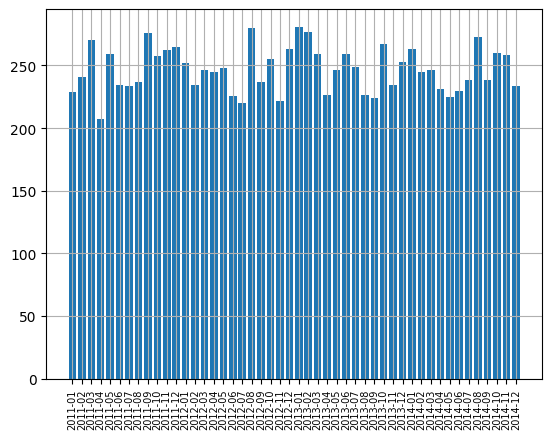

In [25]:
plt.bar(df_monthly_sales['month'], df_monthly_sales['avg_check'])
plt.xticks(rotation = 90, fontsize = 7)
plt.grid()
plt.show()

### Все 4 года средний чек держался более - менее на одном уровне, но на графике роста выручки явно прослеживается положительный тренд,
### такое возможно если росло количество покупок вместе с выручкой от этих покупок, 
### проверим это

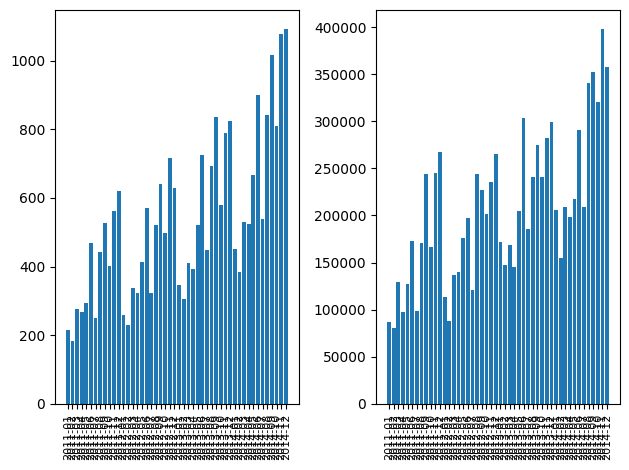

In [26]:
fig_ms, ax_ms = plt.subplots(1,2)
ax_ms[0].bar(df_monthly_sales[['month', 'order_id']].drop_duplicates().groupby('month', as_index = False).count()['month'],
             df_monthly_sales[['month', 'order_id']].drop_duplicates().groupby('month', as_index = False).count()['order_id'])

ax_ms[1].bar(df_monthly_sales[['month', 'sales']].drop_duplicates().groupby('month', as_index = False).sum()['month'],
             df_monthly_sales[['month', 'sales']].drop_duplicates().groupby('month', as_index = False).sum()['sales'])
plt.setp([ax_ms[0].get_xticklabels(), ax_ms[1].get_xticklabels()], fontsize = 8, rotation = 90)
fig_ms.tight_layout()

### Графики сильно похожи, другими словами количество заказов и их соимость меняются одинаково в разрезе месяцев, при равномерном распределении среднего чека;
### такое может быть если клиенты покупали одинаковые товары(либо товары с одинаковой стоимостью) в разном количестве каждый месяц

In [27]:
np.corrcoef(df_monthly_sales[['month','order_id']].groupby('month')['order_id'].count(),
            df_monthly_sales[['month','sales']].groupby('month')['sales'].count())

array([[1., 1.],
       [1., 1.]])

### Найдем соотношение выручки и количества заказов по каждой категории за каждый месяц,
### а затем посчитаем количество похожих соотношений, если их окажется много - 
### значит действительно клиенты покупают одни и те же товары в разном количестве

In [28]:
df_monthly_sales['sub_category'] = df['sub_category']
sales_to_orders = pd.merge(df_monthly_sales[['sub_category','order_id', 'month']].drop_duplicates()\
         .groupby(['sub_category', 'month'], as_index = False).count().sort_values('order_id', ascending = False),
         df_monthly_sales[['sub_category', 'sales', 'month']].drop_duplicates()\
         .groupby(['sub_category', 'month'], as_index = False).sum().sort_values('sales', ascending = False), 
         on = ['sub_category', 'month'], how = 'inner')
sales_to_orders['sales/orders'] = round(sales_to_orders['sales']/sales_to_orders['order_id'])#соотношение выручка/кол-во
sales_to_orders.groupby('sub_category',as_index=False)['sales/orders'].mean().sort_values('sales/orders', ascending=False)

C:\Users\cours\AppData\Local\Temp\ipykernel_11520\1775565007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_sales['sub_category'] = df['sub_category']


,sub_category,sales/orders
16,Tables,912.020833
6,Copiers,671.291667
4,Bookcases,643.041667
1,Appliances,590.895833
11,Machines,554.270833
13,Phones,524.125000
5,Chairs,460.333333
0,Accessories,241.645833
14,Storage,234.958333
9,Furnishings,120.229167


### Большинство соотношений расположены около 180, значит клиенты действительно ориентированы на товары определенной категории

### Посмотрим какая доля заказов так или иначе имеет отношение к каждой категории

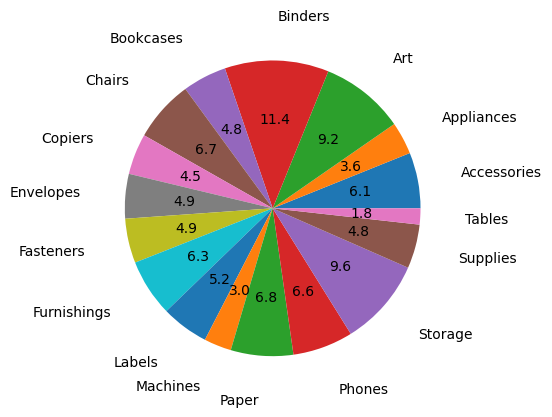

In [29]:
fig_categ = plt.pie(df[['sub_category', 'order_id']].drop_duplicates().groupby('sub_category', as_index = False).count()['order_id'],
                    labels = df[['sub_category', 'order_id']].drop_duplicates().groupby('sub_category', as_index = False).count()['sub_category'],
                    autopct = '%1.1f', labeldistance = 1.3)

### Проведем АВС анализ по товарам в разрезе каждого года

In [30]:
df_abc = df[['year', 'sub_category', 'sales']].groupby(['sub_category', 'year'], as_index = False)\
.sum().sort_values(['year', 'sales'], ascending = [True, False])
df_abc['share'] = df_abc['sales']/df_abc[['sales', 'year']].groupby('year')['sales'].transform('sum') #доля от всей выручки за год
df_abc['cumsum'] = df_abc[['year', 'share']].groupby('year', as_index = False)['share'].cumsum() # кумулятивная сумма долей
df_abc['class'] = pd.cut(df_abc['cumsum'], bins = [0,0.8,0.95,1], labels = ['A','B','C'])#класс

In [31]:
#pd.set_option('display.max_rows', None)
df_abc

,sub_category,year,sales,share,cumsum,class
52,Phones,2011,337298,0.149279,0.149279,A
20,Chairs,2011,285714,0.126449,0.275729,A
16,Bookcases,2011,259388,0.114798,0.390527,A
24,Copiers,2011,216380,0.095764,0.486291,A
56,Storage,2011,205629,0.091006,0.577297,A
...,...,...,...,...,...,...
63,Supplies,2014,86298,0.020069,0.956233,C
51,Paper,2014,79627,0.018518,0.974751,C
31,Envelopes,2014,54102,0.012582,0.987333,C
35,Fasteners,2014,28561,0.006642,0.993975,C


### Составим горизонтальную таблицу

In [32]:
i = 2012
abc = df_abc.query("year == 2011")[['year' ,'sub_category', 'class']].drop_duplicates()
while i <= 2014:
    abc = pd.concat([abc.reset_index(drop=True),
                  df_abc[df_abc['year']==i][['year', 'sub_category', 'class']]\
                     .drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1

In [33]:
abc

,year,sub_category,class,year,sub_category,class,year,sub_category,class,year,sub_category,class
0,2011,Phones,A,2012,Phones,A,2013,Phones,A,2014,Phones,A
1,2011,Chairs,A,2012,Copiers,A,2013,Chairs,A,2014,Copiers,A
2,2011,Bookcases,A,2012,Bookcases,A,2013,Copiers,A,2014,Bookcases,A
3,2011,Copiers,A,2012,Chairs,A,2013,Bookcases,A,2014,Chairs,A
4,2011,Storage,A,2012,Storage,A,2013,Storage,A,2014,Storage,A
5,2011,Appliances,A,2012,Appliances,A,2013,Appliances,A,2014,Appliances,A
6,2011,Machines,A,2012,Accessories,A,2013,Accessories,A,2014,Machines,A
7,2011,Tables,A,2012,Tables,A,2013,Tables,A,2014,Accessories,A
8,2011,Accessories,B,2012,Machines,B,2013,Machines,B,2014,Tables,B
9,2011,Binders,B,2012,Binders,B,2013,Binders,B,2014,Binders,B


### Можно заметить, что биндеры, согласно АВС анализу получили категорию В, 
### хотя они фигурируют в наибольшем количестве заказов среди товарных категорий, 
### В то время как телефоны имея меньший процент по заказам за все годы получили категорию А
### другимим словами телефоны(как и другие товары категории А) приносят большую выручку чем биндеры

### Проведем XYZ анализ

In [34]:
df_xyz = df[['sub_category', 'order_date', 'sales', 'year']]
df_xyz['month'] = df_xyz['order_date'].dt.strftime('%Y-%m')
df_xyz = df_xyz[['year', 'sub_category', 'month', 'sales']].groupby(['month', 'sub_category', 'year'],
                                                            as_index = False).sum()[['sub_category', 'sales','year']]

df_xyz['var_coef'] = df_xyz.groupby(['sub_category','year'], as_index = False)['sales'].transform('std')/\
                     df_xyz.groupby(['sub_category', 'year'], as_index = False)['sales'].transform('mean') #коэффициент вариации
df_xyz = df_xyz[['sub_category', 'var_coef', 'year']].drop_duplicates()

C:\Users\cours\AppData\Local\Temp\ipykernel_11520\3826555560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xyz['month'] = df_xyz['order_date'].dt.strftime('%Y-%m')


In [35]:
df_xyz['class'] = pd.cut(df_xyz['var_coef'], bins = [0,0.1,0.25,1], labels = ['X','Y','Z']) #класс категории

In [36]:
i = 2012
xyz = df_xyz.query("year == 2011")[['year' ,'sub_category', 'class', 'var_coef']].drop_duplicates()
while i <= 2014:
    xyz = pd.concat([xyz.reset_index(drop=True),
                  df_xyz[df_xyz['year']==i][['year' ,'sub_category', 'class', 'var_coef']].drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1

### Судя по результатам анализа все товарные категории довольно волатильны

In [37]:
xyz

,year,sub_category,class,var_coef,year,sub_category,class,var_coef,year,sub_category,class,var_coef,year,sub_category,class,var_coef
0,2011,Accessories,Z,0.469247,2012,Accessories,Z,0.430219,2013,Accessories,Z,0.450874,2014,Accessories,Z,0.391119
1,2011,Appliances,Z,0.631728,2012,Appliances,Z,0.590574,2013,Appliances,Z,0.308751,2014,Appliances,Z,0.404073
2,2011,Art,Z,0.396963,2012,Art,Z,0.434400,2013,Art,Z,0.405176,2014,Art,Z,0.350438
3,2011,Binders,Z,0.653655,2012,Binders,Z,0.425830,2013,Binders,Z,0.552533,2014,Binders,Z,0.479156
4,2011,Bookcases,Z,0.557398,2012,Bookcases,Z,0.382751,2013,Bookcases,Z,0.387507,2014,Bookcases,Z,0.376083
5,2011,Chairs,Z,0.488710,2012,Chairs,Z,0.450989,2013,Chairs,Z,0.278869,2014,Chairs,Z,0.408803
6,2011,Copiers,Z,0.483877,2012,Copiers,Z,0.413425,2013,Copiers,Z,0.361920,2014,Copiers,Z,0.399045
7,2011,Envelopes,Z,0.437203,2012,Envelopes,Z,0.402275,2013,Envelopes,Z,0.457921,2014,Envelopes,Z,0.368047
8,2011,Fasteners,Z,0.364285,2012,Fasteners,Z,0.379693,2013,Fasteners,Z,0.495434,2014,Fasteners,Z,0.413470
9,2011,Furnishings,Z,0.415368,2012,Furnishings,Z,0.386028,2013,Furnishings,Z,0.425315,2014,Furnishings,Z,0.380070


### Составим объединенную горизонтальную таблицу по годам и товарам

In [38]:
df_abcxyz = df_abc.merge(df_xyz, on = ['year', 'sub_category'], how = 'inner')[['sub_category', 'year', 'class_x', 'class_y']]

In [39]:
i = 2012
abcxyz = df_abcxyz.query("year == 2011")[['sub_category', 'year', 'class_x', 'class_y']].drop_duplicates()
while i <= 2014:
    abcxyz = pd.concat([abcxyz.reset_index(drop=True),
                  df_abcxyz[df_abcxyz['year']==i][['sub_category', 'year', 'class_x', 'class_y']].drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1

In [40]:
df_abcxyz

,sub_category,year,class_x,class_y
0,Phones,2011,A,Z
1,Chairs,2011,A,Z
2,Bookcases,2011,A,Z
3,Copiers,2011,A,Z
4,Storage,2011,A,Z
...,...,...,...,...
63,Supplies,2014,C,Z
64,Paper,2014,C,Z
65,Envelopes,2014,C,Z
66,Fasteners,2014,C,Z


In [41]:
abcxyz

,sub_category,year,class_x,class_y,sub_category,year,class_x,class_y,sub_category,year,class_x,class_y,sub_category,year,class_x,class_y
0,Phones,2011,A,Z,Phones,2012,A,Z,Phones,2013,A,Z,Phones,2014,A,Z
1,Chairs,2011,A,Z,Copiers,2012,A,Z,Chairs,2013,A,Z,Copiers,2014,A,Z
2,Bookcases,2011,A,Z,Bookcases,2012,A,Z,Copiers,2013,A,Z,Bookcases,2014,A,Z
3,Copiers,2011,A,Z,Chairs,2012,A,Z,Bookcases,2013,A,Z,Chairs,2014,A,Z
4,Storage,2011,A,Z,Storage,2012,A,Z,Storage,2013,A,Z,Storage,2014,A,Z
5,Appliances,2011,A,Z,Appliances,2012,A,Z,Appliances,2013,A,Z,Appliances,2014,A,Z
6,Machines,2011,A,Z,Accessories,2012,A,Z,Accessories,2013,A,Z,Machines,2014,A,Z
7,Tables,2011,A,Z,Tables,2012,A,Z,Tables,2013,A,Z,Accessories,2014,A,Z
8,Accessories,2011,B,Z,Machines,2012,B,Z,Machines,2013,B,Z,Tables,2014,B,Z
9,Binders,2011,B,Z,Binders,2012,B,Z,Binders,2013,B,Z,Binders,2014,B,Z


### Сделаем такую же таблицу, но по прибыли

In [42]:
df_abc_profit = df[['year', 'sub_category', 'profit']].groupby(['sub_category', 'year'], as_index = False)\
.sum().sort_values(['year', 'profit'], ascending = [True, False])
df_abc_profit['share'] = df_abc_profit['profit']/df_abc_profit[['profit', 'year']].groupby('year')['profit'].transform('sum')
df_abc_profit['cumsum'] = df_abc_profit[['year', 'share']].groupby('year', as_index = False)['share'].cumsum()
df_abc_profit['class'] = df_abc_profit['cumsum'].apply(lambda x: 'A' if x <= 0.80  else ('B' if x <= 0.95 else 'C'))

i = 2012
abc_profit = df_abc_profit.query("year == 2011")[['year' ,'sub_category', 'class']].drop_duplicates()
while i <= 2014:
    abc_profit = pd.concat([abc_profit.reset_index(drop=True),
                  df_abc_profit[df_abc_profit['year']==i][['year', 'sub_category', 'class']]\
                     .drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1


df_xyz_profit = df[['sub_category', 'order_date', 'profit', 'year']]
df_xyz_profit['month'] = df_xyz_profit['order_date'].dt.strftime('%Y-%m')
df_xyz_profit = df_xyz_profit[['year', 'sub_category', 'month', 'profit']].groupby(['month', 'sub_category', 'year'],
                                                            as_index = False).sum()[['sub_category', 'profit','year']]

df_xyz_profit['var_coef'] = df_xyz_profit.groupby(['sub_category','year'], as_index = False)['profit'].transform('std')/\
                     df_xyz_profit.groupby(['sub_category', 'year'], as_index = False)['profit'].transform('mean')
df_xyz_profit = df_xyz_profit[['sub_category', 'var_coef', 'year']].drop_duplicates()
df_xyz_profit['class'] = df_xyz_profit['var_coef'].apply(lambda x: 'X' if x <= 0.1 else('Y' if x <= 0.25 and x > 0.1 else 'Z'))

i = 2012
xyz_profit = df_xyz_profit.query("year == 2011")[['year' ,'sub_category', 'class', 'var_coef']].drop_duplicates()
while i <= 2014:
    xyz_profit = pd.concat([xyz_profit.reset_index(drop=True),
                  df_xyz_profit[df_xyz_profit['year']==i][['year' ,'sub_category', 'class', 'var_coef']].drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1


df_abcxyz_profit = df_abc_profit.merge(df_xyz_profit, on = ['year', 'sub_category'], how = 'inner')[['sub_category', 'year', 'class_x', 'class_y']]

i = 2012
abcxyz_profit = df_abcxyz_profit.query("year == 2011")[['sub_category', 'year', 'class_x', 'class_y']].drop_duplicates()
while i <= 2014:
    abcxyz_profit = pd.concat([abcxyz_profit.reset_index(drop=True),
                  df_abcxyz_profit[df_abcxyz_profit['year']==i][['sub_category', 'year', 'class_x', 'class_y']]\
                               .drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1

C:\Users\cours\AppData\Local\Temp\ipykernel_11520\1116231515.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xyz_profit['month'] = df_xyz_profit['order_date'].dt.strftime('%Y-%m')


In [43]:
abcxyz_profit

,sub_category,year,class_x,class_y,sub_category,year,class_x,class_y,sub_category,year,class_x,class_y,sub_category,year,class_x,class_y
0,Phones,2011,A,Z,Copiers,2012,A,Z,Copiers,2013,A,Z,Copiers,2014,A,Z
1,Copiers,2011,A,Z,Phones,2012,A,Z,Phones,2013,A,Z,Phones,2014,A,Z
2,Chairs,2011,A,Z,Accessories,2012,A,Z,Bookcases,2013,A,Z,Bookcases,2014,A,Z
3,Bookcases,2011,A,Z,Chairs,2012,A,Z,Chairs,2013,A,Z,Appliances,2014,A,Z
4,Appliances,2011,A,Z,Bookcases,2012,A,Z,Appliances,2013,A,Z,Accessories,2014,A,Z
5,Storage,2011,A,Z,Appliances,2012,A,Z,Accessories,2013,A,Z,Chairs,2014,A,Z
6,Accessories,2011,A,Z,Storage,2012,A,Z,Storage,2013,A,Z,Storage,2014,B,Z
7,Binders,2011,B,Z,Binders,2012,B,Z,Binders,2013,B,Z,Binders,2014,B,Z
8,Paper,2011,B,Z,Machines,2012,B,Z,Paper,2013,B,Z,Paper,2014,B,Z
9,Art,2011,B,Z,Art,2012,B,Z,Art,2013,B,Z,Art,2014,B,Z


### Среди товарных категорий лучшей, с точки зрения АВС анализа по прибыли не выявлено

### АВС анализ также можно провести по рентабельности

In [44]:
df_abc_profit_to_sales = df[['year', 'sub_category', 'sales', 'profit']].groupby(['sub_category', 'year'], as_index = False)\
.sum().sort_values(['year', 'profit'], ascending = [True, False])
df_abc_profit_to_sales['p/s'] = df_abc_profit_to_sales['profit']/df_abc_profit_to_sales['sales']
df_abc_profit_to_sales['share'] = df_abc_profit_to_sales['p/s']/df_abc_profit_to_sales[['p/s', 'year']].groupby('year')['p/s'].transform('sum')
df_abc_profit_to_sales = df_abc_profit_to_sales.sort_values(['year', 'p/s'], ascending = [True, False])
df_abc_profit_to_sales['cumsum'] = df_abc_profit_to_sales[['year', 'share']].groupby('year', as_index = False)['share'].cumsum()
df_abc_profit_to_sales['class'] = df_abc_profit_to_sales['cumsum'].apply(lambda x: 'A' if x <= 0.80  else ('B' if x <= 0.95 else 'C'))

i = 2012
abc_profit_to_sales = df_abc_profit_to_sales.query("year == 2011")[['year' ,'sub_category', 'class']].drop_duplicates()
while i <= 2014:
    abc_profit_to_sales = pd.concat([abc_profit_to_sales.reset_index(drop=True),
                  df_abc_profit_to_sales[df_abc_profit_to_sales['year']==i][['year', 'sub_category', 'class']]\
                     .drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1

In [45]:
df_abc_profit_to_sales

,sub_category,year,sales,profit,p/s,share,cumsum,class
48,Paper,2011,42652,10664.9635,0.250046,0.116416,0.116416,A
40,Labels,2011,13614,3118.8878,0.229094,0.106662,0.223078,A
28,Envelopes,2011,27988,5066.1793,0.181013,0.084276,0.307354,A
8,Art,2011,64162,10399.0233,0.162074,0.075459,0.382812,A
52,Phones,2011,337298,53927.4895,0.159881,0.074437,0.457250,A
...,...,...,...,...,...,...,...,...
59,Storage,2014,383443,39016.9521,0.101754,0.047837,0.945911,B
63,Supplies,2014,86298,7365.4090,0.085349,0.040125,0.986035,C
23,Chairs,2014,493380,41248.2716,0.083603,0.039304,1.025340,C
47,Machines,2014,260286,18627.7453,0.071566,0.033645,1.058985,C


In [46]:
i = 2012
abcprofit_to_sales = df_abc_profit_to_sales.query("year == 2011")[['year' ,'sub_category', 'class']].drop_duplicates()
while i <= 2014:
    abcprofit_to_sales = pd.concat([abcprofit_to_sales.reset_index(drop=True),
                  df_abc_profit_to_sales[df_abc_profit_to_sales['year']==i][['year', 'sub_category', 'class']]\
                     .drop_duplicates().reset_index(drop=True)],
                  axis = 1)
    i+=1
abcprofit_to_sales

,year,sub_category,class,year,sub_category,class,year,sub_category,class,year,sub_category,class
0,2011,Paper,A,2012,Labels,A,2013,Paper,A,2014,Paper,A
1,2011,Labels,A,2012,Paper,A,2013,Labels,A,2014,Labels,A
2,2011,Envelopes,A,2012,Accessories,A,2013,Envelopes,A,2014,Copiers,A
3,2011,Art,A,2012,Binders,A,2013,Accessories,A,2014,Accessories,A
4,2011,Phones,A,2012,Envelopes,A,2013,Binders,A,2014,Art,A
5,2011,Fasteners,A,2012,Copiers,A,2013,Copiers,A,2014,Envelopes,A
6,2011,Copiers,A,2012,Fasteners,A,2013,Appliances,A,2014,Appliances,A
7,2011,Accessories,A,2012,Art,A,2013,Art,A,2014,Binders,A
8,2011,Appliances,A,2012,Phones,A,2013,Fasteners,A,2014,Fasteners,A
9,2011,Binders,A,2012,Furnishings,A,2013,Furnishings,A,2014,Phones,A


### Посчитаем среднюю длительность доставки по каждому виду

In [47]:
df_delivery_dur = df[['ship_mode', 'order_date', 'ship_date', 'order_id']]

In [48]:
df_delivery_dur['duration'] = df_delivery_dur['ship_date'] - df_delivery_dur['order_date']
df_delivery_dur['common_dur'] = df_delivery_dur['duration'].mean()
df_delivery_dur[['ship_mode', 'duration', 'common_dur']].groupby(['ship_mode', 'common_dur'], as_index = False).mean()

C:\Users\cours\AppData\Local\Temp\ipykernel_11520\1971176264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_dur['duration'] = df_delivery_dur['ship_date'] - df_delivery_dur['order_date']
C:\Users\cours\AppData\Local\Temp\ipykernel_11520\1971176264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_dur['common_dur'] = df_delivery_dur['duration'].mean()


,ship_mode,common_dur,duration
0,First Class,3 days 23:15:53.589393644,2 days 04:21:42.811459027
1,Same Day,3 days 23:15:53.589393644,0 days 00:53:50.803406145
2,Second Class,3 days 23:15:53.589393644,3 days 05:31:28.175380735
3,Standard Class,3 days 23:15:53.589393644,4 days 23:57:08.744110479


### Расчитаем частоту покупок по пользователю

In [49]:
df_order_freq = df[['order_date', 'customer_name']].drop_duplicates().sort_values(['customer_name', 'order_date'], 
                                                                                  ascending = [True, True])
df_order_freq['next_order'] = df_order_freq.groupby('customer_name')['order_date'].shift(-1)
df_order_freq['timediff'] = df_order_freq['next_order'] - df_order_freq['order_date']
df_order_freq['order_num'] = df_order_freq.groupby('customer_name')['order_date'].transform('count')
df_order_freq = df_order_freq.dropna()
df_order_freq = df_order_freq[['customer_name', 'order_num', 'timediff']].groupby(['customer_name', 'order_num'], as_index = False).mean()
df_order_freq['common_avg_timediff'] = df_order_freq['timediff'].mean()
df_order_freq['common_median_timediff'] = df_order_freq['timediff'].median()

In [50]:
df_order_freq

,customer_name,order_num,timediff,common_avg_timediff,common_median_timediff
0,Aaron Bergman,37,38 days 18:00:00,45 days 03:32:47.440051998,44 days 06:27:41.538461538
1,Aaron Hawkins,34,40 days 12:21:49.090909091,45 days 03:32:47.440051998,44 days 06:27:41.538461538
2,Aaron Smayling,31,45 days 06:24:00,45 days 03:32:47.440051998,44 days 06:27:41.538461538
3,Adam Bellavance,39,37 days 08:12:37.894736842,45 days 03:32:47.440051998,44 days 06:27:41.538461538
4,Adam Hart,40,33 days 06:46:09.230769231,45 days 03:32:47.440051998,44 days 06:27:41.538461538
...,...,...,...,...,...
790,Xylona Preis,30,48 days 04:08:16.551724138,45 days 03:32:47.440051998,44 days 06:27:41.538461538
791,Yana Sorensen,31,46 days 12:00:00,45 days 03:32:47.440051998,44 days 06:27:41.538461538
792,Yoseph Carroll,30,48 days 20:41:22.758620689,45 days 03:32:47.440051998,44 days 06:27:41.538461538
793,Zuschuss Carroll,37,33 days 02:40:00,45 days 03:32:47.440051998,44 days 06:27:41.538461538


### Итак видим , что средняя частота покупок среди клиентов 45 дней, а медианная 44 дня.